from scipy import signal
import numpy as np
import tensorflow as tf

In [2]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory("../data/data3",
    validation_split=0.10, 
    subset="both", 
    seed=42,
    image_size=(100,100), 
    batch_size=64, 
)

Found 2000 files belonging to 2 classes.
Using 1800 files for training.
Using 200 files for validation.


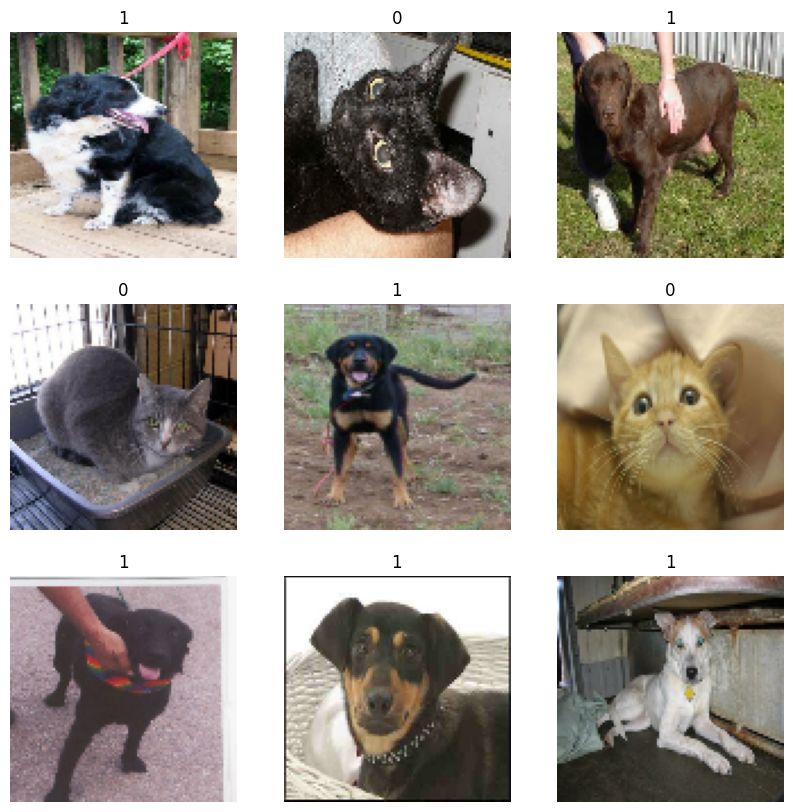

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds.take(1):
    # отрисуем 9 картинок из батча
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")

In [4]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.5),
    ]
)

In [5]:
train_ds = train_ds.map(lambda img, label: (data_augmentation(img), label))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [6]:
inputs = tf.keras.Input(shape=(100, 100, 3))
# преобразуем значения пикселей из [0, 255] к [0, 1]
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
# первый сверточный слой
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same")(x)
# первый пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# второй сверточный слой
x = tf.keras.layers.Conv2D(128, 4, strides=2, padding="same")(x)
# второй пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# выпрямляем многомерный массив
x = tf.keras.layers.Flatten()(x)
# полносвязный слой с 64 нейронами
x = tf.keras.layers.Dense(64, activation="relu")(x)
# выходной слой с функцией sofrmax
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       131200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                         

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [9]:
model.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
29/29 [==============================] - 4s 121ms/step - loss: 2.1459 - accuracy: 0.5211 - val_loss: 0.7061 - val_accuracy: 0.5350
Epoch 2/20
29/29 [==============================] - 3s 111ms/step - loss: 0.7652 - accuracy: 0.5250 - val_loss: 1.0646 - val_accuracy: 0.5050
Epoch 3/20
29/29 [==============================] - 4s 119ms/step - loss: 0.7780 - accuracy: 0.5256 - val_loss: 0.6796 - val_accuracy: 0.5300
Epoch 4/20
29/29 [==============================] - 3s 112ms/step - loss: 0.6802 - accuracy: 0.5839 - val_loss: 0.6676 - val_accuracy: 0.6100
Epoch 5/20
29/29 [==============================] - 3s 111ms/step - loss: 0.6588 - accuracy: 0.6083 - val_loss: 0.7384 - val_accuracy: 0.5300
Epoch 6/20
29/29 [==============================] - 3s 111ms/step - loss: 0.6974 - accuracy: 0.5606 - val_loss: 0.6651 - val_accuracy: 0.5950
Epoch 7/20
29/29 [==============================] - 3s 112ms/step - loss: 0.6560 - accuracy: 0.6106 - val_loss: 0.6580 - val_accuracy: 0.6050
Epoch 

In [29]:
from keras.models import load_model
model1= load_model('my_model.h5')

In [30]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [31]:
model1.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_3" is incompatible with the layer: expected shape=(None, 200, 400, 3), found shape=(None, 100, 100, 3)


In [32]:
model1.fit(train_ds, epochs=40, validation_data=test_ds)

Epoch 1/40


ValueError: in user code:

    File "C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_3" is incompatible with the layer: expected shape=(None, 200, 400, 3), found shape=(None, 100, 100, 3)


In [ ]:
model1.fit(train_ds, epochs=2, validation_data=test_ds)

In [33]:
inputs = tf.keras.Input(shape=(100, 100, 3))
# преобразуем значения пикселей из [0, 255] к [0, 1]
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
# первый сверточный слой
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same")(x)
# первый пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# второй сверточный слой
x = tf.keras.layers.Conv2D(128, 4, strides=2, padding="same")(x)
# второй пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# выпрямляем многомерный массив
x = tf.keras.layers.Flatten()(x)
# полносвязный слой с 64 нейронами
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
# выходной слой с функцией sofrmax
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model2 = tf.keras.Model(inputs, outputs)

In [34]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 128)       131200    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                       

In [35]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="binary_crossentropy", metrics=["accuracy"])

In [36]:
model2.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
29/29 [==============================] - 4s 112ms/step - loss: 2.0360 - accuracy: 0.5128 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 2/10
29/29 [==============================] - 3s 109ms/step - loss: 0.6930 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 3/10
29/29 [==============================] - 3s 107ms/step - loss: 0.6947 - accuracy: 0.5061 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 4/10
29/29 [==============================] - 3s 106ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 5/10
29/29 [==============================] - 3s 106ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 6/10
29/29 [==============================] - 3s 108ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6933 - val_accuracy: 0.4950
Epoch 7/10
29/29 [==============================] - 3s 113ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 

In [37]:
inputs = tf.keras.Input(shape=(100, 100, 3))
# преобразуем значения пикселей из [0, 255] к [0, 1]
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
# первый сверточный слой
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same")(x)
# первый пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# второй сверточный слой
x = tf.keras.layers.Conv2D(128, 4, strides=2, padding="same")(x)
# второй пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# выпрямляем многомерный массив
x = tf.keras.layers.Flatten()(x)
# полносвязный слой с 64 нейронами
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
# выходной слой с функцией sofrmax
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model3 = tf.keras.Model(inputs, outputs)

In [38]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [39]:
model3.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
29/29 [==============================] - 4s 112ms/step - loss: 0.6937 - accuracy: 0.5467 - val_loss: 0.6701 - val_accuracy: 0.5750
Epoch 2/10
29/29 [==============================] - 3s 109ms/step - loss: 0.6782 - accuracy: 0.5744 - val_loss: 0.6727 - val_accuracy: 0.5550
Epoch 3/10
29/29 [==============================] - 3s 109ms/step - loss: 0.6628 - accuracy: 0.5961 - val_loss: 0.6296 - val_accuracy: 0.6200
Epoch 4/10
29/29 [==============================] - 4s 118ms/step - loss: 0.6510 - accuracy: 0.6111 - val_loss: 0.6326 - val_accuracy: 0.5900
Epoch 5/10
29/29 [==============================] - 3s 112ms/step - loss: 0.6436 - accuracy: 0.6228 - val_loss: 0.6294 - val_accuracy: 0.6100
Epoch 6/10
29/29 [==============================] - 3s 110ms/step - loss: 0.6335 - accuracy: 0.6494 - val_loss: 0.5856 - val_accuracy: 0.7100
Epoch 7/10
29/29 [==============================] - 3s 110ms/step - loss: 0.6360 - accuracy: 0.6456 - val_loss: 0.5996 - val_accuracy: 0.6500
Epoch 

In [40]:
model3.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
29/29 [==============================] - 3s 109ms/step - loss: 0.6072 - accuracy: 0.6717 - val_loss: 0.6616 - val_accuracy: 0.6250
Epoch 2/5
29/29 [==============================] - 3s 109ms/step - loss: 0.6003 - accuracy: 0.6778 - val_loss: 0.5696 - val_accuracy: 0.6650
Epoch 3/5
29/29 [==============================] - 3s 108ms/step - loss: 0.6061 - accuracy: 0.6683 - val_loss: 0.5841 - val_accuracy: 0.6850
Epoch 4/5
29/29 [==============================] - 3s 112ms/step - loss: 0.5852 - accuracy: 0.6828 - val_loss: 0.5981 - val_accuracy: 0.6750
Epoch 5/5
29/29 [==============================] - 3s 112ms/step - loss: 0.5882 - accuracy: 0.6894 - val_loss: 0.5750 - val_accuracy: 0.6500


In [41]:
model3.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
29/29 [==============================] - 3s 110ms/step - loss: 0.5937 - accuracy: 0.6794 - val_loss: 0.5587 - val_accuracy: 0.7050
Epoch 2/5
29/29 [==============================] - 3s 111ms/step - loss: 0.5993 - accuracy: 0.6850 - val_loss: 0.5694 - val_accuracy: 0.7100
Epoch 3/5
29/29 [==============================] - 3s 109ms/step - loss: 0.5865 - accuracy: 0.6867 - val_loss: 0.5535 - val_accuracy: 0.7250
Epoch 4/5
29/29 [==============================] - 3s 109ms/step - loss: 0.5863 - accuracy: 0.6878 - val_loss: 0.5672 - val_accuracy: 0.7200
Epoch 5/5
29/29 [==============================] - 4s 118ms/step - loss: 0.5785 - accuracy: 0.6983 - val_loss: 0.6951 - val_accuracy: 0.6650


In [10]:
img = tf.keras.preprocessing.image.load_img(
    "../data/data3/cats/109.jpg", target_size=(100, 100)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 83ms/step


array([[0.86595553, 0.13404451]], dtype=float32)

2 и 3 задания


In [19]:
train_ds1, test_ds1 = tf.keras.utils.image_dataset_from_directory("../data/3_classes",
    validation_split=0.18, 
    subset="both", 
    seed=42,
    image_size=(224,224), 
    batch_size=16, 
)

Found 214 files belonging to 3 classes.
Using 176 files for training.
Using 38 files for validation.


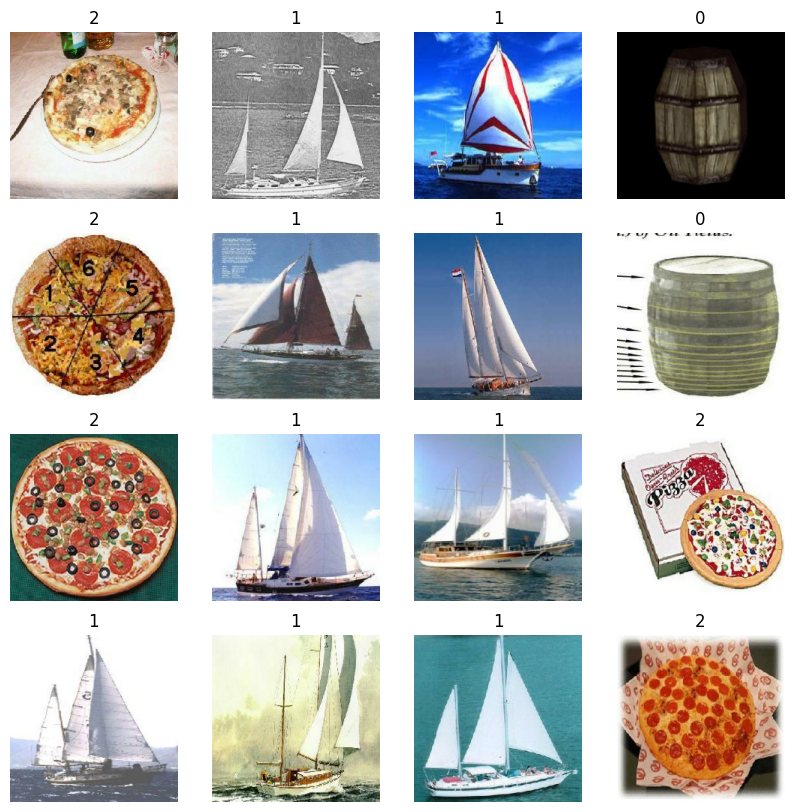

In [20]:
plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds1.take(1):
    # отрисуем все картинки из батча
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")

In [21]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
# сохраним ссылку на входной слой сети
inp = vgg.input

# создадим новый слой классификации по нашему количеству классов
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')

# соединим предпоследний слой VGG и наш новый слой классификации
out = new_classification_layer(vgg.layers[-2].output)

# создадим новую модель
model_new = tf.keras.Model(inp, out)

In [23]:
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True
model_new.layers[1].trainable = True

In [24]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_new.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [25]:
model_new.fit(train_ds1, epochs=5, validation_data=test_ds1)

Epoch 1/5
11/11 [==============================] - 49s 4s/step - loss: 0.2916 - accuracy: 0.8864 - val_loss: 0.0492 - val_accuracy: 0.9737
Epoch 2/5
11/11 [==============================] - 50s 5s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9737
Epoch 3/5
11/11 [==============================] - 49s 5s/step - loss: 6.0549e-04 - accuracy: 1.0000 - val_loss: 0.0424 - val_accuracy: 0.9737
Epoch 4/5
11/11 [==============================] - 49s 4s/step - loss: 1.5422e-04 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9737
Epoch 5/5
11/11 [==============================] - 49s 4s/step - loss: 9.8855e-05 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9737


In [26]:
img1 = tf.keras.preprocessing.image.load_img(
    "../data/3_classes/pizza/image_0005.jpg", target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img1)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new.predict(img_array)
predictions

1/1 [==============================] - 0s 267ms/step


array([[7.4551927e-08, 2.9893077e-10, 9.9999988e-01]], dtype=float32)

In [40]:
inc = tf.keras.applications.InceptionV3(weights='imagenet', include_top=True)
inc.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_96 (Conv2D)             (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_96[0][0]']              
 ormalization)                  )                                                      

 batch_normalization_99 (BatchN  (None, 35, 35, 64)  192         ['conv2d_101[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 35, 35, 64)  192         ['conv2d_103[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 35, 35, 96)  288         ['conv2d_106[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 35, 35, 32)  96          ['conv2d_107[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 35, 35, 64)  192         ['conv2d_118[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_116 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_119 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_8[0][0]']        
                                                                                                  
 conv2d_130 (Conv2D)            (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 17, 17, 128)  384        ['conv2d_130[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_140 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 17, 17, 160)  480        ['conv2d_140[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_141 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_151 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 17, 17, 160)  480        ['conv2d_151[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 17, 17, 192)  576        ['conv2d_161[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_157 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_162 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_166 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_170 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 17, 17, 192)  576        ['conv2d_166[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 17, 17, 192)  576        ['conv2d_170[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 8, 8, 320)   960         ['conv2d_172[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 8, 8, 192)   576         ['conv2d_189[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 8, 8, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [41]:
inp = inc.input

new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')

out = new_classification_layer(inc.layers[-2].output)

model_new1 = tf.keras.Model(inp, out)
for layer in model_new1.layers:
    layer.trainable = False
model_new1.layers[-1].trainable = True
model_new1.layers[2].trainable = True
model_new1.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_96 (Conv2D)             (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_96[0][0]']              
 ormalization)                  )                                                           

 batch_normalization_99 (BatchN  (None, 35, 35, 64)  192         ['conv2d_101[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 35, 35, 64)  192         ['conv2d_103[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 35, 35, 96)  288         ['conv2d_106[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 35, 35, 32)  96          ['conv2d_107[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 35, 35, 64)  192         ['conv2d_118[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_116 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_119 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_8[0][0]']        
                                                                                                  
 conv2d_130 (Conv2D)            (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 17, 17, 128)  384        ['conv2d_130[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_140 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 17, 17, 160)  480        ['conv2d_140[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_141 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_151 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 17, 17, 160)  480        ['conv2d_151[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 17, 17, 192)  576        ['conv2d_161[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_157 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_162 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_166 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_170 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 17, 17, 192)  576        ['conv2d_166[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 17, 17, 192)  576        ['conv2d_170[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 8, 8, 320)   960         ['conv2d_172[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 8, 8, 192)   576         ['conv2d_189[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 8, 8, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [42]:
model_new1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_new1.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_96 (Conv2D)             (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_96[0][0]']              
 ormalization)                  )                                                           

 batch_normalization_99 (BatchN  (None, 35, 35, 64)  192         ['conv2d_101[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 35, 35, 64)  192         ['conv2d_103[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 35, 35, 96)  288         ['conv2d_106[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 35, 35, 32)  96          ['conv2d_107[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 35, 35, 64)  192         ['conv2d_118[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_116 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_119 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_8[0][0]']        
                                                                                                  
 conv2d_130 (Conv2D)            (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 17, 17, 128)  384        ['conv2d_130[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_140 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 17, 17, 160)  480        ['conv2d_140[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_141 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_151 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 17, 17, 160)  480        ['conv2d_151[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 17, 17, 192)  576        ['conv2d_161[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_157 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_162 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_166 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_170 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 17, 17, 192)  576        ['conv2d_166[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 17, 17, 192)  576        ['conv2d_170[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 8, 8, 320)   960         ['conv2d_172[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 8, 8, 192)   576         ['conv2d_189[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 8, 8, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [43]:
train_ds2, test_ds2 = tf.keras.utils.image_dataset_from_directory("../data/3_classes",
    validation_split=0.18, 
    subset="both", 
    seed=42,
    image_size=(299,299), 
    batch_size=16, 
)

Found 214 files belonging to 3 classes.
Using 176 files for training.
Using 38 files for validation.


In [44]:
model_new1.fit(train_ds2, epochs=5, validation_data=test_ds2)

Epoch 1/5
11/11 [==============================] - 28s 2s/step - loss: 0.8116 - accuracy: 0.6705 - val_loss: 1.6716 - val_accuracy: 0.2895
Epoch 2/5
11/11 [==============================] - 25s 2s/step - loss: 0.1868 - accuracy: 0.9716 - val_loss: 1.3135 - val_accuracy: 0.4474
Epoch 3/5
11/11 [==============================] - 25s 2s/step - loss: 0.0652 - accuracy: 1.0000 - val_loss: 0.8529 - val_accuracy: 0.7105
Epoch 4/5
11/11 [==============================] - 25s 2s/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.3798 - val_accuracy: 0.8947
Epoch 5/5
11/11 [==============================] - 25s 2s/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.1762 - val_accuracy: 0.9474


In [45]:
img2 = tf.keras.preprocessing.image.load_img(
    "../data/3_classes/barrel/image_0025.jpg", target_size=(299, 299)
)
img_array1 = tf.keras.preprocessing.image.img_to_array(img2)
img_array1 = tf.expand_dims(img_array1, 0)

predictions1 = model_new1.predict(img_array1)
predictions1

1/1 [==============================] - 1s 796ms/step


array([[0.99311525, 0.00476854, 0.00211625]], dtype=float32)

In [66]:
class Pooling: //сверточный
    def __init__(self, kernel):
        self.kernel = kernel
        
    def rotate(self):
        N = len(self.kernel)
        kernel = self.kernel
        for i in range(N // 2):
            for j in range(N):
                temp = kernel[i][j]
                kernel[i][j] = kernel[N - i - 1][N - j - 1]
                kernel[N - i - 1][N - j - 1] = temp
        return kernel

    def valid(self, x):
        kernel = self.rotate()
        n1, n2 = x.shape
        m1, m2 = kernel.shape
        Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
        for i in range(n1):
            for j in range(n2):
              Y[i:i+m1,j:j+m2] += x[i,j]*kernel
        result = Y[m1-1:-m1+1,m2-1:-m2+1]
        return result
    
    def full(self, x):
        kernel = self.rotate()
        n1, n2 = x.shape
        m1, m2 = kernel.shape
        Y = np.zeros((n1 + 1, n2 + 1))
        for i in range(n1):
            for j in range(n2):
              Y[i:i+m1,j:j+m2] += x[i,j]*kernel
        return Y

    def same(self, x):
        kernel = self.rotate()
        n1, n2 = x.shape
        m1, m2 = kernel.shape
        Y = np.zeros((n1 + m1, n2 + m1))
        for i in range(n1):
            for j in range(n2):
              Y[i:i+m1,j:j+m2] += x[i,j]*kernel
        result = Y[m1-1:-m1+1,m2-1:-m2+1]
        return result

In [89]:
a = np.array([
    [4, 2, 1, 5],
    [7, 3, 2, 1],
    [5, 3, 9, 4],
    [6, 6, 8, 8]
])
kernel = np.array([
    [-0.4, 3.4],
    [2, -5]
])

In [92]:
PoolingShtuka = Pooling(kernel)
print(PoolingShtuka.valid(a))

[[  4.2  -1.4  15.6]
 [  2.4 -33.4   0.6]
 [ -9.8   1.4 -14. ]]


In [94]:
print(PoolingShtuka.full(a))

[[-20.   -2.   -1.  -23.   10. ]
 [-21.4   4.2  -1.4  15.6   0. ]
 [ -1.2   2.4 -33.4   0.6   7.6]
 [-13.   -9.8   1.4 -14.   14.4]
 [ 20.4  18.   24.8  24.   -3.2]]


In [96]:
print(PoolingShtuka.same(a))

[[  4.2  -1.4  15.6   0. ]
 [  2.4 -33.4   0.6   7.6]
 [ -9.8   1.4 -14.   14.4]
 [ 18.   24.8  24.   -3.2]]


In [85]:
from scipy import signal
signal.correlate2d(a, kernel, "valid"), signal.correlate2d(a, kernel, "full"), signal.correlate2d(a, kernel, "same")

(array([[  4.2,  -1.4,  15.6],
        [  2.4, -33.4,   0.6],
        [ -9.8,   1.4, -14. ]]),
 array([[-20. ,  -2. ,  -1. , -23. ,  10. ],
        [-21.4,   4.2,  -1.4,  15.6,   0. ],
        [ -1.2,   2.4, -33.4,   0.6,   7.6],
        [-13. ,  -9.8,   1.4, -14. ,  14.4],
        [ 20.4,  18. ,  24.8,  24. ,  -3.2]]),
 array([[  4.2,  -1.4,  15.6,   0. ],
        [  2.4, -33.4,   0.6,   7.6],
        [ -9.8,   1.4, -14. ,  14.4],
        [ 18. ,  24.8,  24. ,  -3.2]]))